In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [2]:
(X_train,Y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
Y_train=Y_train.reshape(-1,)

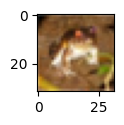

In [18]:
plt.figure(figsize=(10,1))
plt.imshow(X_train[0])



In [19]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [22]:
def imag(index,x,y):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])


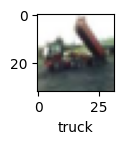

In [23]:
imag(2,X_train,Y_train)

In [32]:
cnn_model=keras.Sequential([
  keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
  keras.layers.MaxPooling2D((2,2)),
  keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
  keras.layers.MaxPooling2D((2,2)),
  keras.layers.Flatten(),
  keras.layers.Dense(64,activation='relu'),
  keras.layers.Dense(10,activation='softmax')
])

cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
cnn_model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 48s 27ms/step - loss: 1.6831 - accuracy: 0.4353
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2473 - accuracy: 0.5650
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1063 - accuracy: 0.6173
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0083 - accuracy: 0.6509
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9414 - accuracy: 0.6755
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8881 - accuracy: 0.6920
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8316 - accuracy: 0.7131
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7885 - accuracy: 0.7278
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7556 - accuracy: 0.7372
Epoch 10/10
1563/1563 [==============================] - 48s 31m

In [34]:
y_pred=cnn_model.predict(x_test)

313/313 [==============================] - 9s 24ms/step


In [41]:
y_pred_new=[]
for i in y_pred:
  y_pred_new.append(np.argmax(i))

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

cm=confusion_matrix(y_test,y_pred_new)

In [43]:
cm

array([[736,  25,  59,  14,  23,   6,  12,  27,  59,  39],
       [ 30, 821,   6,   9,   2,   2,   8,   3,  19, 100],
       [ 95,  14, 517,  33, 120,  61,  61,  67,  14,  18],
       [ 43,  21,  97, 395, 112, 118,  81,  81,  21,  31],
       [ 35,   6,  87,  30, 639,  27,  50, 107,  10,   9],
       [ 17,   8,  94, 145,  85, 486,  47,  92,  11,  15],
       [  9,  16,  77,  47,  79,  18, 714,  15,  10,  15],
       [ 34,  12,  41,  25,  59,  29,  15, 763,   5,  17],
       [127,  42,  20,  12,   8,   9,   6,  12, 711,  53],
       [ 52, 116,   7,   6,   6,   7,   7,  31,  20, 748]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.62      0.74      0.68      1000
           1       0.76      0.82      0.79      1000
           2       0.51      0.52      0.52      1000
           3       0.55      0.40      0.46      1000
           4       0.56      0.64      0.60      1000
           5       0.64      0.49      0.55      1000
           6       0.71      0.71      0.71      1000
           7       0.64      0.76      0.69      1000
           8       0.81      0.71      0.76      1000
           9       0.72      0.75      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

